# INSTALL JULIA - COLAB

PEGUE O SCRIPT DE TEMPLATE [AQUI](https://colab.research.google.com/drive/1lLHnAUl1kqPB6Fc1tF9r19om24DbYYFh)!

In [40]:
# %%shell
# set -e

# #---------------------------------------------------#
# JULIA_VERSION="1.10.4" # any version ≥ 0.7.0
# JULIA_PACKAGES="IJulia BenchmarkTools Plots"
# JULIA_NUM_THREADS=2
# #---------------------------------------------------#

# if [ -z `which julia` ]; then
# # Install Julia
# JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
# echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
# BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
# URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
# wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
# tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
# rm /tmp/julia.tar.gz

# # Install Packages
# for PKG in `echo $JULIA_PACKAGES`; do
#     echo "Installing Julia package $PKG..."
#     julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
# done

# # Install kernel and rename it to "julia"
# echo "Installing IJulia kernel..."
# julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
#     "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
# KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
# KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
# mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

# echo ''
# echo "Successfully installed `julia -v`!"
# echo "Please reload this page (press Ctrl+R or F5) then"
# echo "jump to the 'Checking the Installation' section."
# fi

In [41]:
versioninfo()

Julia Version 1.10.4
Commit 48d4fd4843 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 6 × Intel(R) Core(TM) i5-9400F CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
Threads: 1 default, 0 interactive, 1 GC (on 6 virtual cores)


# PROJETO 1

## LIBS

In [42]:
using Random
using Statistics
using Plots

## VARS & VECS

In [43]:
# Const
benchmark_count = 1
img_output = "bench"

"bench"

In [44]:
# List Sizes
n_values = [10^i for i in 4:7] # Vectors Sizes
q_values = [10^i for i in 2:5] # Amount of Keys

Random.seed!(1234)

# Initialize the list of vectors and keys
key_list = [rand(1:10^3, q) for q in q_values]
vec_list = [rand(1:10^4, n) for n in n_values]

4-element Vector{Vector{Int64}}:
 [8125, 6793, 2484, 5811, 4842, 9293, 769, 5666, 9508, 1318  …  2624, 3509, 9128, 3797, 6861, 134, 917, 3140, 7124, 8463]
 [8181, 3808, 7847, 7142, 5960, 7242, 6810, 715, 9895, 9051  …  6226, 6410, 1753, 706, 4090, 2890, 5474, 2718, 6190, 1019]
 [1047, 591, 1789, 6812, 2102, 9703, 380, 3144, 4156, 9922  …  1798, 7575, 1667, 9901, 339, 3845, 7271, 5758, 565, 9453]
 [4136, 5818, 9935, 2116, 3759, 2866, 2528, 2408, 1224, 5629  …  410, 7123, 5221, 9185, 2088, 3843, 5660, 8736, 4069, 2076]

In [45]:
# Initialize the list of timers
simple_times = zeros(length(n_values), length(q_values))
optimized_times = zeros(length(n_values), length(q_values))
binary_times = zeros(length(n_values), length(q_values))
sorting_times = zeros(length(n_values))

4-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0

## SEARCH FUNCTIONS

In [46]:
function simple_search(vector, key)
    for element in vector
        if element == key
            return true
        end
    end
    return false
end

simple_search (generic function with 1 method)

In [47]:
# Busca Linear Otimizada
function optimized_search(sorted_vec, key)
    for element in sorted_vec
        if element == key
            return true
        elseif element > key
            return false
        end
    end
    return false
end

optimized_search (generic function with 1 method)

In [48]:
function binary_search(sorted_vec, key)
    low, high = 1, length(sorted_vec)
    while low <= high
        mid = div(low + high, 2)
        if sorted_vec[mid] == key
            return true
        elseif sorted_vec[mid] < key
            low = mid + 1
        else
            high = mid - 1
        end
    end
    return false
end

binary_search (generic function with 1 method)

## DUMMY

In [49]:
# Dummy search function
function dummy_search(search_func, vector, keys)
    [search_func(vector, k) for k in keys]
end

dummy_search (generic function with 1 method)

In [50]:
# Benchmark macro
function my_benchmark(search_func, time_matrix)
    for i in 1:length(vec_list) # For each vector size
        for j in 1:length(key_list)  # For each key numbers
            median_time = zeros(benchmark_count)
            for c in 1:benchmark_count
                start = time_ns()
                [search_func(vec_list[i], k) for k in key_list[j]]
                final = time_ns()
                median_time[c] = (final - start) / 1e9
            end
            time_matrix[i, j] = median(median_time)
        end
    end
end

my_benchmark (generic function with 1 method)

## BENCHMARK

In [51]:
# Measure sorting
for i in 1:length(vec_list)
    median_time = zeros(benchmark_count)
    for c in 1:benchmark_count
        start = time_ns()
        sort(vec_list[i], alg=MergeSort)
        final = time_ns()
        median_time[c] = (final - start) / 1e9
    end
    sorting_times[i] = median(median_time)
end

In [52]:
[sort!(sublist) for sublist in vec_list]
vec_list

4-element Vector{Vector{Int64}}:
 [1, 2, 2, 3, 3, 4, 7, 8, 9, 9  …  9995, 9996, 9996, 9997, 9998, 9998, 9999, 9999, 10000, 10000]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  9999, 9999, 9999, 9999, 9999, 9999, 10000, 10000, 10000, 10000]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]

In [53]:
# Measure linear search
my_benchmark(simple_search, simple_times)

In [54]:
# Measure optimized search
my_benchmark(optimized_search, optimized_times)

In [55]:
# Measure binary search
my_benchmark(binary_search, binary_times)

## PLOTS

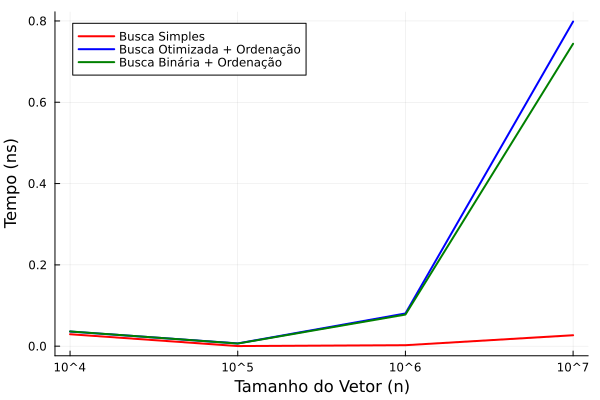

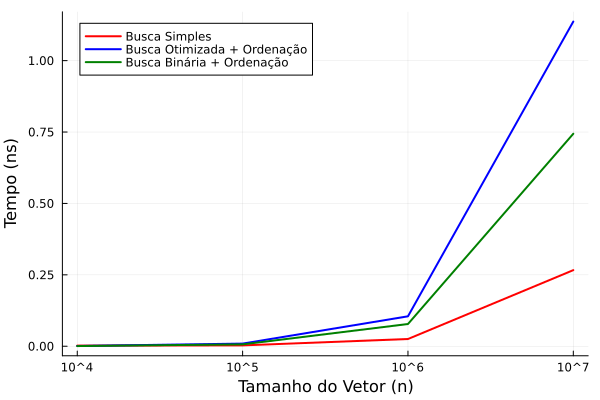

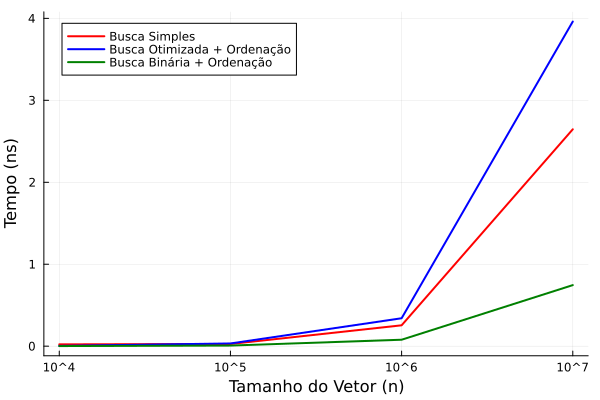

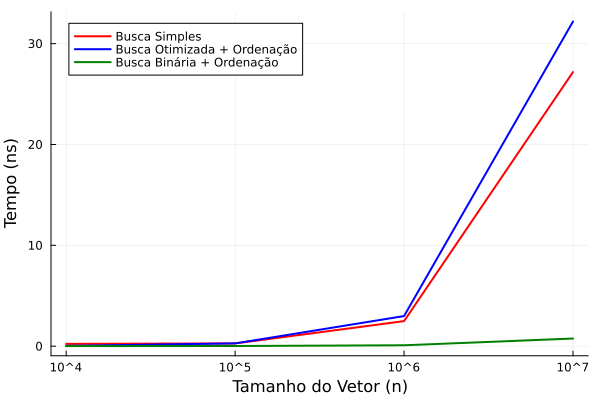

In [56]:
for i in 1:4
    p = plot(
        #title="Quantidade de buscas = $(q_values[i])",
        xlabel="Tamanho do Vetor (n)",
        ylabel="Tempo (ns)",
        xscale=:log10,
        #yscale=:log10,
        legend=:topleft,
        xticks=([10^4, 10^5, 10^6, 10^7], ["10^4", "10^5", "10^6", "10^7"])
    )

    plot!(
        p,
        n_values,
        simple_times[:, i],
        label="Busca Simples",
        color=:red,
        lw= 2,
    )

    total_optimized_times = sorting_times .+ optimized_times[:, i]
    plot!(
        p,
        n_values,
        total_optimized_times,
        label="Busca Otimizada + Ordenação",
        color=:blue,
        lw= 2
    )

    total_binary_times = sorting_times .+ binary_times[:, i]
    plot!(
        p,
        n_values,
        total_binary_times,
        label="Busca Binária + Ordenação",
        color=:green,
        lw= 2
    )

    # plot!(
    #     p,
    #     n_values,
    #     sorting_times,
    #     label="Ordenação",
    #     color=:yellow,
    #     lw= 2
    # )

    display(p)
    savefig(p, "../imgs/q_size/$(img_output)_$(benchmark_count)-q_$(q_values[i]).png")
end

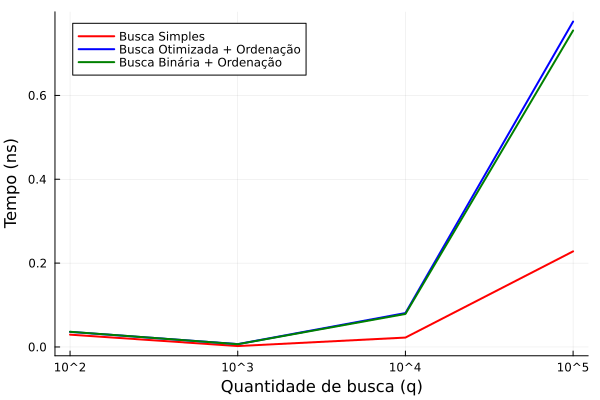

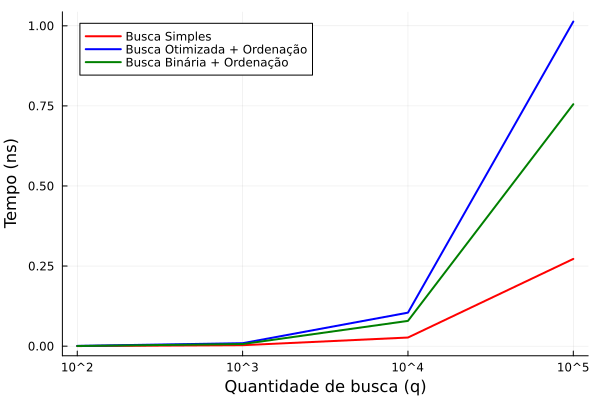

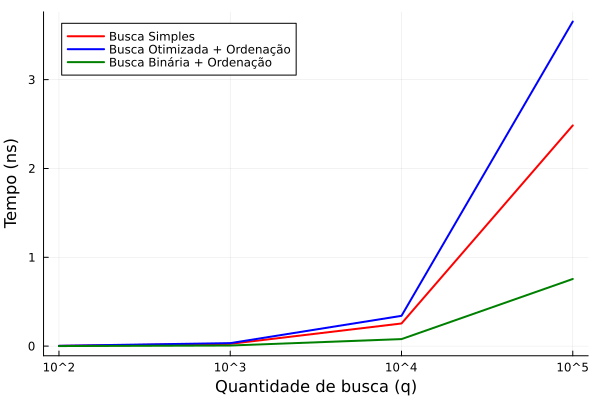

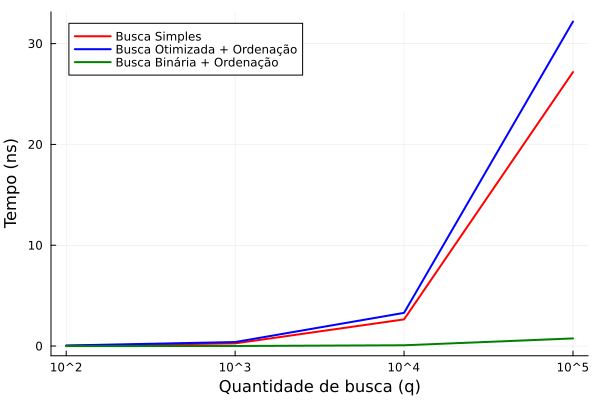

In [57]:
for i in 1:4
    p = plot(
        # title="Tamanho do vetor = $(n_values[i])",
        xlabel="Quantidade de busca (q)",
        ylabel="Tempo (ns)",
        xscale=:log10,
        #yscale=:log10,
        legend=:topleft,
        xticks=([10^2, 10^3, 10^4, 10^5], ["10^2", "10^3", "10^4", "10^5"])
    )

    plot!(
        p,
        q_values,
        simple_times[i, :],
        label="Busca Simples",
        color=:red,
        lw= 2,
    )

    total_optimized_times = sorting_times .+ optimized_times[i, :]
    plot!(
        p,
        q_values,
        total_optimized_times,
        label="Busca Otimizada + Ordenação",
        color=:blue,
        lw= 2
    )

    total_binary_times = sorting_times .+ binary_times[i, :]
    plot!(
        p,
        q_values,
        total_binary_times,
        label="Busca Binária + Ordenação",
        color=:green,
        lw= 2
    )

    # plot!(
    #     p,
    #     n_values,
    #     sorting_times,
    #     label="Ordenação",
    #     color=:yellow,
    #     lw= 2
    # )

    display(p)
    savefig(p, "../imgs/n_size/$(img_output)_$(benchmark_count)-n_$(n_values[i]).png")
end